# Assignment 2
## Introduction to Data Analytics
### Humber College - March 2022
#### Name: Nguyen Anh Tuan Le
#### Student ID: N014141295

1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

2. Read the given csv file as a dataframe.

In [2]:
df = pd.read_csv("Realestate.csv")

3. Perform exploratory data analysis (EDA). For example, single variate and
bivariate analysis. Write your observations.

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

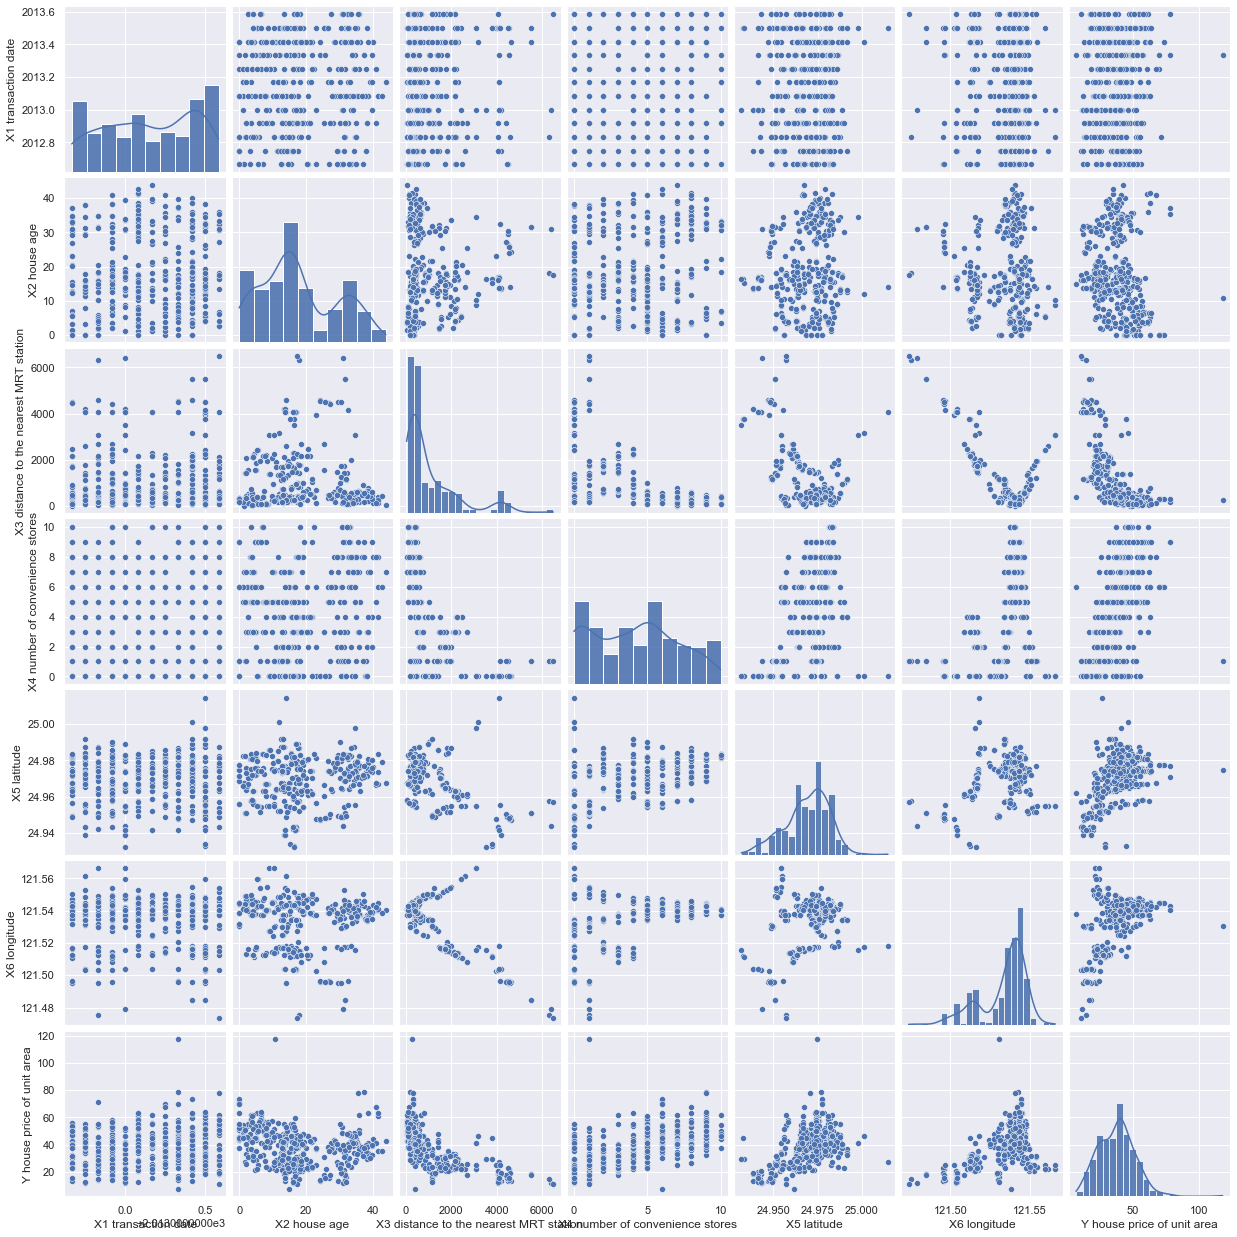

In [7]:
sns.set()
sns.pairplot(df.drop('No', axis=1)).map_diag(sns.histplot, kde=True)

<AxesSubplot:>

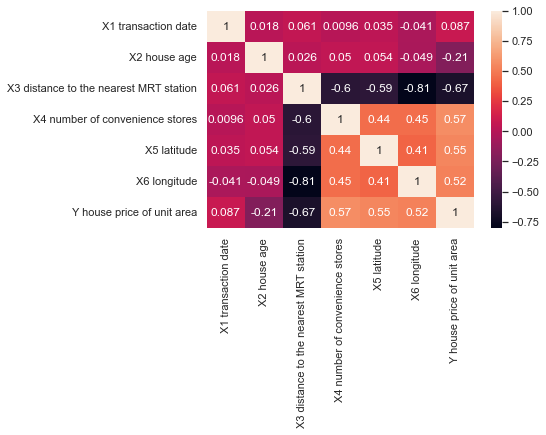

In [8]:
sns.heatmap(df.drop('No', axis=1).corr(), annot=True)

<AxesSubplot:xlabel='X1 transaction date', ylabel='Count'>

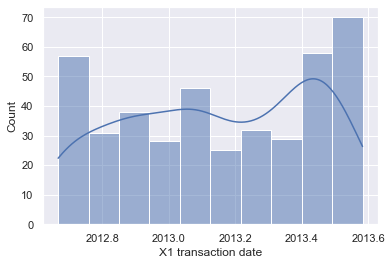

In [9]:
sns.histplot(df['X1 transaction date'], kde=True)

<AxesSubplot:xlabel='X2 house age', ylabel='Count'>

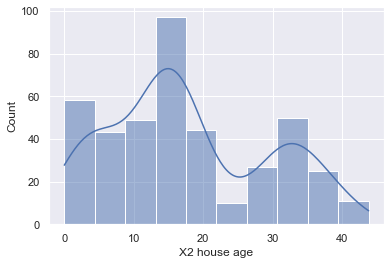

In [10]:
sns.histplot(df['X2 house age'], kde=True)

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Count'>

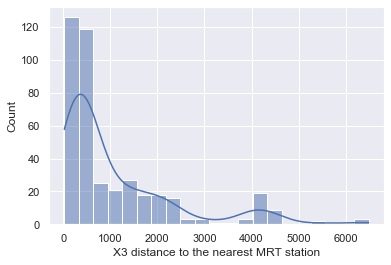

In [11]:
sns.histplot(df['X3 distance to the nearest MRT station'], kde=True)

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Count'>

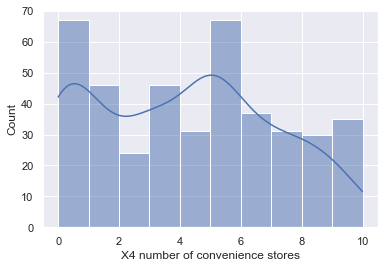

In [12]:
sns.histplot(df['X4 number of convenience stores'], kde=True)

<AxesSubplot:xlabel='X5 latitude', ylabel='Count'>

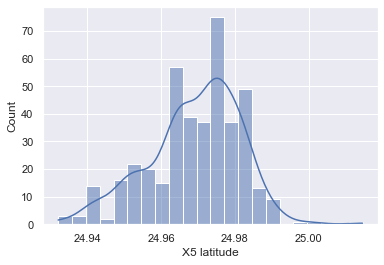

In [13]:
sns.histplot(df['X5 latitude'], kde=True)

<AxesSubplot:xlabel='X6 longitude', ylabel='Count'>

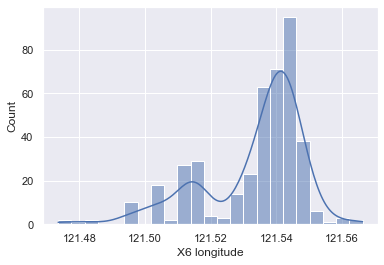

In [14]:
sns.histplot(df['X6 longitude'], kde=True)

<AxesSubplot:xlabel='Y house price of unit area', ylabel='Count'>

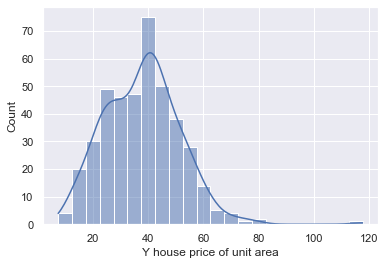

In [15]:
sns.histplot(df['Y house price of unit area'], kde=True)

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

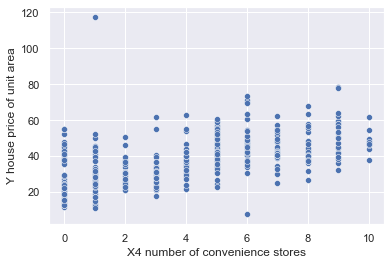

In [16]:
sns.scatterplot(x=df['X4 number of convenience stores'], y=df['Y house price of unit area'])

<AxesSubplot:xlabel='X5 latitude', ylabel='Y house price of unit area'>

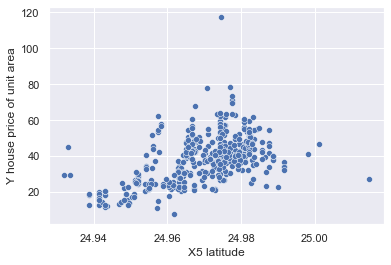

In [17]:
sns.scatterplot(x=df['X5 latitude'], y=df['Y house price of unit area'])

<AxesSubplot:xlabel='X6 longitude', ylabel='Y house price of unit area'>

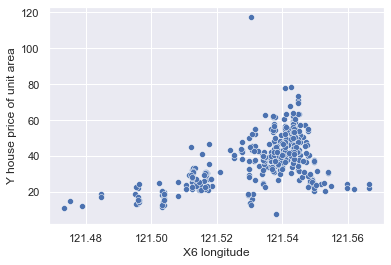

In [18]:
sns.scatterplot(x=df['X6 longitude'], y=df['Y house price of unit area'])

<AxesSubplot:xlabel='X6 longitude', ylabel='X4 number of convenience stores'>

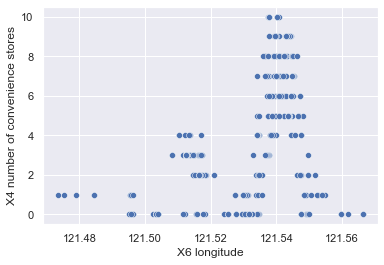

In [19]:
sns.scatterplot(x=df['X6 longitude'], y=df['X4 number of convenience stores'])

<AxesSubplot:xlabel='X5 latitude', ylabel='X4 number of convenience stores'>

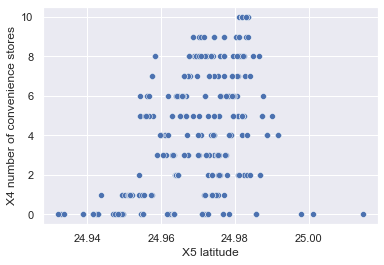

In [20]:
sns.scatterplot(x=df['X5 latitude'], y=df['X4 number of convenience stores'])

#### Exploratory Data Analysis (EDA)
- Univariate Data Analysis
    - X1 transaction date: appears to spread quite evenly between mid 2012 and mid 2013, and follow a negatively skewed distribution with the peak around early-mid 2013
    - X2 house age: follows a positively skewed distribution with the majority of the properties' age is roughly 17 year-old
    - X3 distance to the nearest MRT station: has a positively skewed distribution with most of the properties are near to a MRT station within under 1000m
    - X4 number of convenience stores: leans slightly toward a negatively skewed distribution with peaks at 0 and 5 stores
    - X5 latitude: almost has a symmetrical distribution but generally has a positively skewed distribution with a peak around 24.97
    - X6 longitude: has a slight negatively skewed distribution with a peak around 121.55
    - Y house price of unit area: projects a positively skewed distribution with a peak around 50
- Bivariate Data Analysis
    - Y house price of unit area vs X4 number of convenience stores:
        - Direction: positive
        - Form: linear
        - Strength: moderate
        - Outliers: yes
    - Y house price of unit area vs X5 latitude:
        - Direction: positive
        - Form: linear
        - Strength: moderate
        - Outliers: yes
    - Y house price of unit area vs X6 longitude:
        - Direction: positive
        - Form: linear
        - Strength: moderate
        - Outliers: yes
    - X4 number of convenience stores vs X6 longitude:
        - Direction: positive
        - Form: non-linear
        - Strength: moderate
        - Outliers: yes
    - X4 number of convenience stores vs X5 latitude:
        - Direction: positive
        - Form: non-linear
        - Strength: moderate
        - Outliers: yes

4. Based on your analysis, choose a number of features (as inputs) for prediction of the “house price of unit area”. Prepare the input and target (output) variables.

In [21]:
X = df[['X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

5. Split the data into training and test dataset (20% test).

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 3) (331,) (83, 3) (83,)


6. Perform any necessary preprocessing step (e.g. normalization, replacing
missing values, etc.)

In [23]:
sc = StandardScaler()

scaled = sc.fit_transform(X_train)
scaled = pd.DataFrame(scaled, columns=X_train.columns)
scaled.head()
X_train = scaled

scaled = sc.fit_transform(X_test)
scaled = pd.DataFrame(scaled, columns=X_test.columns)
scaled.head()
X_test = scaled

# X_train['X4 number of convenience stores'] = X_train['X4 number of convenience stores']/np.max(X_train['X4 number of convenience stores'])
# X_train['X5 latitude'] = X_train['X5 latitude']/np.max(X_train['X5 latitude'])
# X_train['X6 longitude'] = X_train['X6 longitude']/np.max(X_train['X6 longitude'])
# X_test['X4 number of convenience stores'] = X_test['X4 number of convenience stores']/np.max(X_test['X4 number of convenience stores'])
# X_test['X5 latitude'] = X_test['X5 latitude']/np.max(X_test['X5 latitude'])
# X_test['X6 longitude'] = X_test['X6 longitude']/np.max(X_test['X6 longitude'])

7. Use two regression models of your choice to predict house price from
the selected features in Step 4.

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
print(lm_pred)
lm.score(X_test, y_test)

[45.58298466 39.2830478  47.86853456 30.27048516 47.47547103 36.05770851
 41.40818994 36.06695107 41.44408227 17.93536895 35.0093289  43.44049663
 32.23803867 31.50323459 39.02559188 49.11209427 50.25628591 30.84623671
 29.31963165 32.26586008 45.51008545 30.99838966 39.55211171 40.49940838
 45.58298466 17.46726871 36.52645794 43.31129704 51.20739709 20.10025167
 18.2752959  52.43020805 34.38637605 16.51903712 31.64829827 51.35228531
 30.46528252 43.50384943 40.17999609 45.85544696 30.46528252 42.48888012
 44.65335185 44.17863394 45.29344593 42.03176243 30.48492771 14.65953111
 41.44078858 16.76032231 36.06695107 45.85544696 44.53641895 49.854839
 39.55211171 25.12725433 45.08551439 45.58298466 45.8373296  30.48492771
 37.34310876 41.95531484 36.05770851 32.49319263 49.11209427 42.48888012
 32.92303493 49.55950457 45.40015397 47.38988553 45.58298466 17.37143392
 30.09223099 34.65229759 39.02559188 41.7531996  48.73045353 31.01726637
 17.74497169 46.40742447 48.39633753 52.43020805 30.1

0.5654171909724947

In [25]:
pm = make_pipeline(PolynomialFeatures(), LinearRegression())
pm.fit(X_train, y_train)
pm_pred = pm.predict(X_test)
print(pm_pred)
pm.score(X_test, y_test)

[46.16231723 41.27997198 46.04438312 26.99640153 51.97735612 44.5939038
 43.07096593 37.00920952 44.52484263 23.5452447  40.35562003 46.27587255
 39.48614626 26.10935122 39.70436569 50.64650879 44.35032802 25.20259652
 27.35318065 29.98636526 45.25554981 26.08078648 41.64772034 41.37518338
 46.16231723 23.04200229 37.57492232 45.70724581 45.83560867 21.89210076
 12.26637827 44.26784389 39.53251691 20.22159186 24.67198965 45.53194273
 27.44238297 46.52607319 41.58466903 47.05082714 27.44238297 45.52904511
 47.68038453 47.44284221 46.25172483 42.75868209 27.64938399 14.54606909
 46.68649935 14.39382739 37.00920952 47.05082714 45.17603336 49.84362898
 41.64772034 25.60309569 45.11349113 46.16231723 46.51483201 27.64938399
 40.76139443 44.62188363 44.5939038  26.93992183 50.64650879 45.52904511
 34.11819529 46.70894228 41.27713787 46.99369015 46.16231723 21.66028318
 30.78747772 39.67231568 39.70436569 43.75975786 46.41055405 25.7908372
 22.36007463 50.1001877  42.33220065 44.26784389 30.7

0.6069869112896515

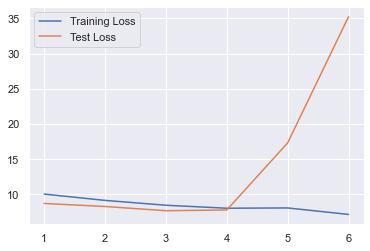

In [26]:
collect_training_loss = []
collect_test_loss = []
collect_m = []
for m in range(1, 7):
    poly_model = make_pipeline(PolynomialFeatures(degree=m),LinearRegression())
    poly_model.fit(X_train, y_train)
    yfit = poly_model.predict(X_test)
    yfit_training = poly_model.predict(X_train)
    collect_test_loss.append(np.sqrt(metrics.mean_squared_error(y_test, yfit)))
    collect_training_loss.append(np.sqrt(metrics.mean_squared_error(y_train, yfit_training)))
    collect_m.append(m)

sns.lineplot(x=collect_m,y=collect_training_loss)
sns.lineplot(x=collect_m,y=collect_test_loss)
plt.legend(labels=['Training Loss', 'Test Loss'])

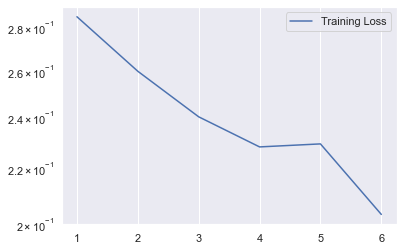

In [27]:
maxi = np.max([np.max(collect_training_loss),np.max(collect_test_loss)])
g_results = sns.lineplot(x=collect_m, y=collect_training_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Training Loss'])

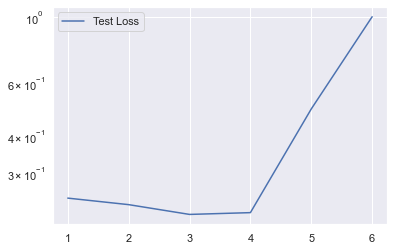

In [28]:
g_results = sns.lineplot(x=collect_m, y=collect_test_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Test Loss'])

The optimal m is 4

In [29]:
pm = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
pm.fit(X_train, y_train)
pm_pred = pm.predict(X_test)
print(pm_pred)
pm.score(X_test, y_test)

[49.46583107 42.76289553 47.19061749 26.5416373  50.49415194 53.87407936
 43.60145758 35.09545019 59.88914302 15.744892   46.09886495 44.88198003
 44.54292166 26.5753532  40.79164658 51.07539607 42.56985434 22.9388482
 26.78162222 28.50959561 47.43765894 21.66165316 47.77029699 42.49635592
 49.46583107 16.58913445 36.18183455 45.77991416 42.52820518 21.19354706
 11.99481318 45.78353993 44.40715268 19.07759027 22.22934536 41.74865271
 26.85029504 47.64549693 42.2793686  51.18095576 26.85029504 45.81228008
 48.50241674 44.44481586 49.90410884 43.53191738 27.04786838  8.699636
 40.34015182 49.24036138 35.09545019 51.18095576 47.974478   49.79695646
 47.77029699 11.55983451 46.26643962 49.46583107 50.07669589 27.04786838
 43.86434792 43.82342639 53.87407936 18.47292057 51.07539607 45.81228008
 30.43751178 45.88543437 32.8436207  49.21946856 49.46583107 17.18358706
 29.39579361 43.08470438 40.79164658 43.60870912 51.72038619 21.94811007
 16.40043852 46.22130881 36.90880401 45.78353993 29.36

0.6525324985326918

8. Evaluate and compare the models using MAE, MSE, and RMSE metrics on the test dataset. Use tables or plots of your choice to compare the models. Discuss which model is better.

In [30]:
print('MAE LM:', metrics.mean_absolute_error(y_test, lm_pred))
print('MAE PM:', metrics.mean_absolute_error(y_test, pm_pred))
print('MSE LM:', metrics.mean_squared_error(y_test, lm_pred))
print('MSE PM:', metrics.mean_squared_error(y_test, pm_pred))
print('RMSE LM:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
print('RMSE PM:', np.sqrt(metrics.mean_squared_error(y_test, pm_pred)))

MAE LM: 6.669256604705175
MAE PM: 5.815249575267395
MSE LM: 75.89512794025357
MSE PM: 60.681393582856934
RMSE LM: 8.711780985553618
RMSE PM: 7.789826287078354


<AxesSubplot:ylabel='Y house price of unit area'>

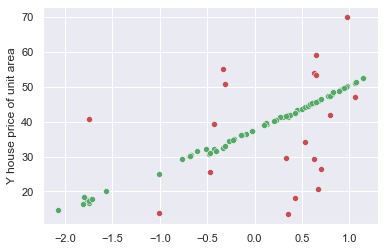

In [31]:
sns.scatterplot(x=X_test.mean(axis=1), y=y_test, color='r')
sns.scatterplot(x=X_test.mean(axis=1), y=lm_pred, color='g')

<AxesSubplot:ylabel='Y house price of unit area'>

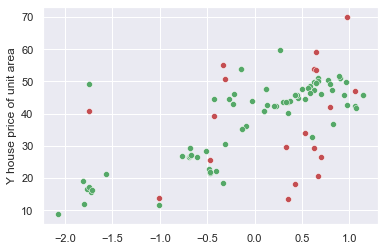

In [32]:
sns.scatterplot(x=X_test.mean(axis=1), y=y_test, color='r')
sns.scatterplot(x=X_test.mean(axis=1), y=pm_pred, color='g')

"The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model." => PolynomialFeatures model predicts better than LinearRegression model in this case. Base on my observation, their performances varies, the models' accuracies can be interchangeable from time to time. As a result, LinearRegression model predicts better than PolynomialFeatures model sometimes.
With a bigger dataset, the relationship between X1 transaction date and Y house price of unit area can be stronger and performance of the models can be clearer.